This notebook contains code to help explore the dataset. 

In [1]:
import os
from pathlib import Path
# os chri to cur
os.chdir(Path.cwd().parent)
# print("cwd is now:", Path.cwd())

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from data_loader import scores_df

null performances after coercion: 0
after saturation filter 2408
after filter num benchmarks 1965
after merge with model versions 1961
after date filter (>= 2022-11-01) 1762
after merge with benchmark dates 1762
Original number of rows: 1762
Number of rows after aggregation: 1320


In [3]:

import seaborn as sns
sns.set()
sns.set_style("whitegrid")

# Custom color palette
custom_colors = [
    '#00A5A6',  # teal
    '#E03D90',  # pink
    '#FC6538',  # orange
    '#6A3ECB',  # purple
    '#0058DC',  # blue
    '#EA8D00',  # yellow
    '#B087F4',  # lightPurple
    '#279E27',  # green
    '#009AF1',  # lightBlue
    '#015D90',  # darkBlue
    '#EA4831',  # red
    '#E1C700',  # yellow2
    '#46FFFF',  # turquoise
    '#63F039',  # lightGreen
]

sns.set_palette(custom_colors)
colors = sns.color_palette()

# === Seaborn global settings ===
sns.set_theme(
    style="whitegrid",        # or "darkgrid", "ticks", "white"
    palette=custom_colors,    # your custom color palette
    context="notebook"        # scaling for labels/titles ("paper", "notebook", "talk", "poster")
)

# === Matplotlib global settings (rcParams) ===
plt.rcParams.update({
    # Figure
    "figure.figsize": (8, 5),
    "figure.dpi": 120,
    
    # Axes
    "axes.titley": 1.02,
    "axes.titlesize": 14,
    "axes.titlelocation": 'center',
    "axes.titlepad": 0,
    "axes.labelsize": 12,
    "axes.labelpad": 10,           # spacing between axis and label
    "axes.spines.top": False,
    "axes.spines.right": False,
    
    # Ticks
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    # tick marks size
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    
    # tick visibility
    "xtick.top": False,
    "xtick.bottom": True,
    "ytick.left": True,
    "ytick.right": False,
    
    # Legend
    "legend.fontsize": 10,
    "legend.loc": "upper left",
    "legend.frameon": True,
    "legend.borderaxespad": 0,

    
    # Lines and markers
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "lines.markeredgecolor": 'auto',   # white outline (stroke)
    "lines.markeredgewidth": 0.5,   
    # title alignment left
    

    
    
    # Error bars
    "errorbar.capsize": 3,
    
    # Font
    "font.family": "Arial",
    "font.sans-serif": ["DejaVu Sans"],
    
    # Grid
    "grid.alpha": 0.3,
    "grid.linestyle": "-",
    "grid.color": "lightgray",
})


In [4]:
len(scores_df["model"].unique())

178

In [5]:
len(scores_df["benchmark"].unique())



38

In [6]:
scores_df[["benchmark_id", "benchmark"]].drop_duplicates()

,benchmark_id,benchmark
0,b1,GPQA diamond
1,b34,Terminal Bench
2,b38,VPCT
3,b9,ARC-AGI
5,b2,FrontierMath-2025-02-28-Private
6,b3,MATH level 5
8,b39,WeirdML
9,b4,OTIS Mock AIME 2024-2025
10,b6,SWE-Bench verified
12,b13,CadEval


/var/folders/dn/nknbl4x9401_pvgxvxc0663w0000gn/T/ipykernel_32520/2362962769.py:56: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for label in ax.get_xticklabels():
/var/folders/dn/nknbl4x9401_pvgxvxc0663w0000gn/T/ipykernel_32520/2362962769.py:62: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  for lbl in ax.get_xticklabels():
/var/folders/dn/nknbl4x9401_pvgxvxc0663w0000gn/T/ipykernel_32520/2362962769.py:68: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.tight_layout(rect=[0, 0, 1, 0.96])
/var/folders/dn/nknbl4x9401_pvgx

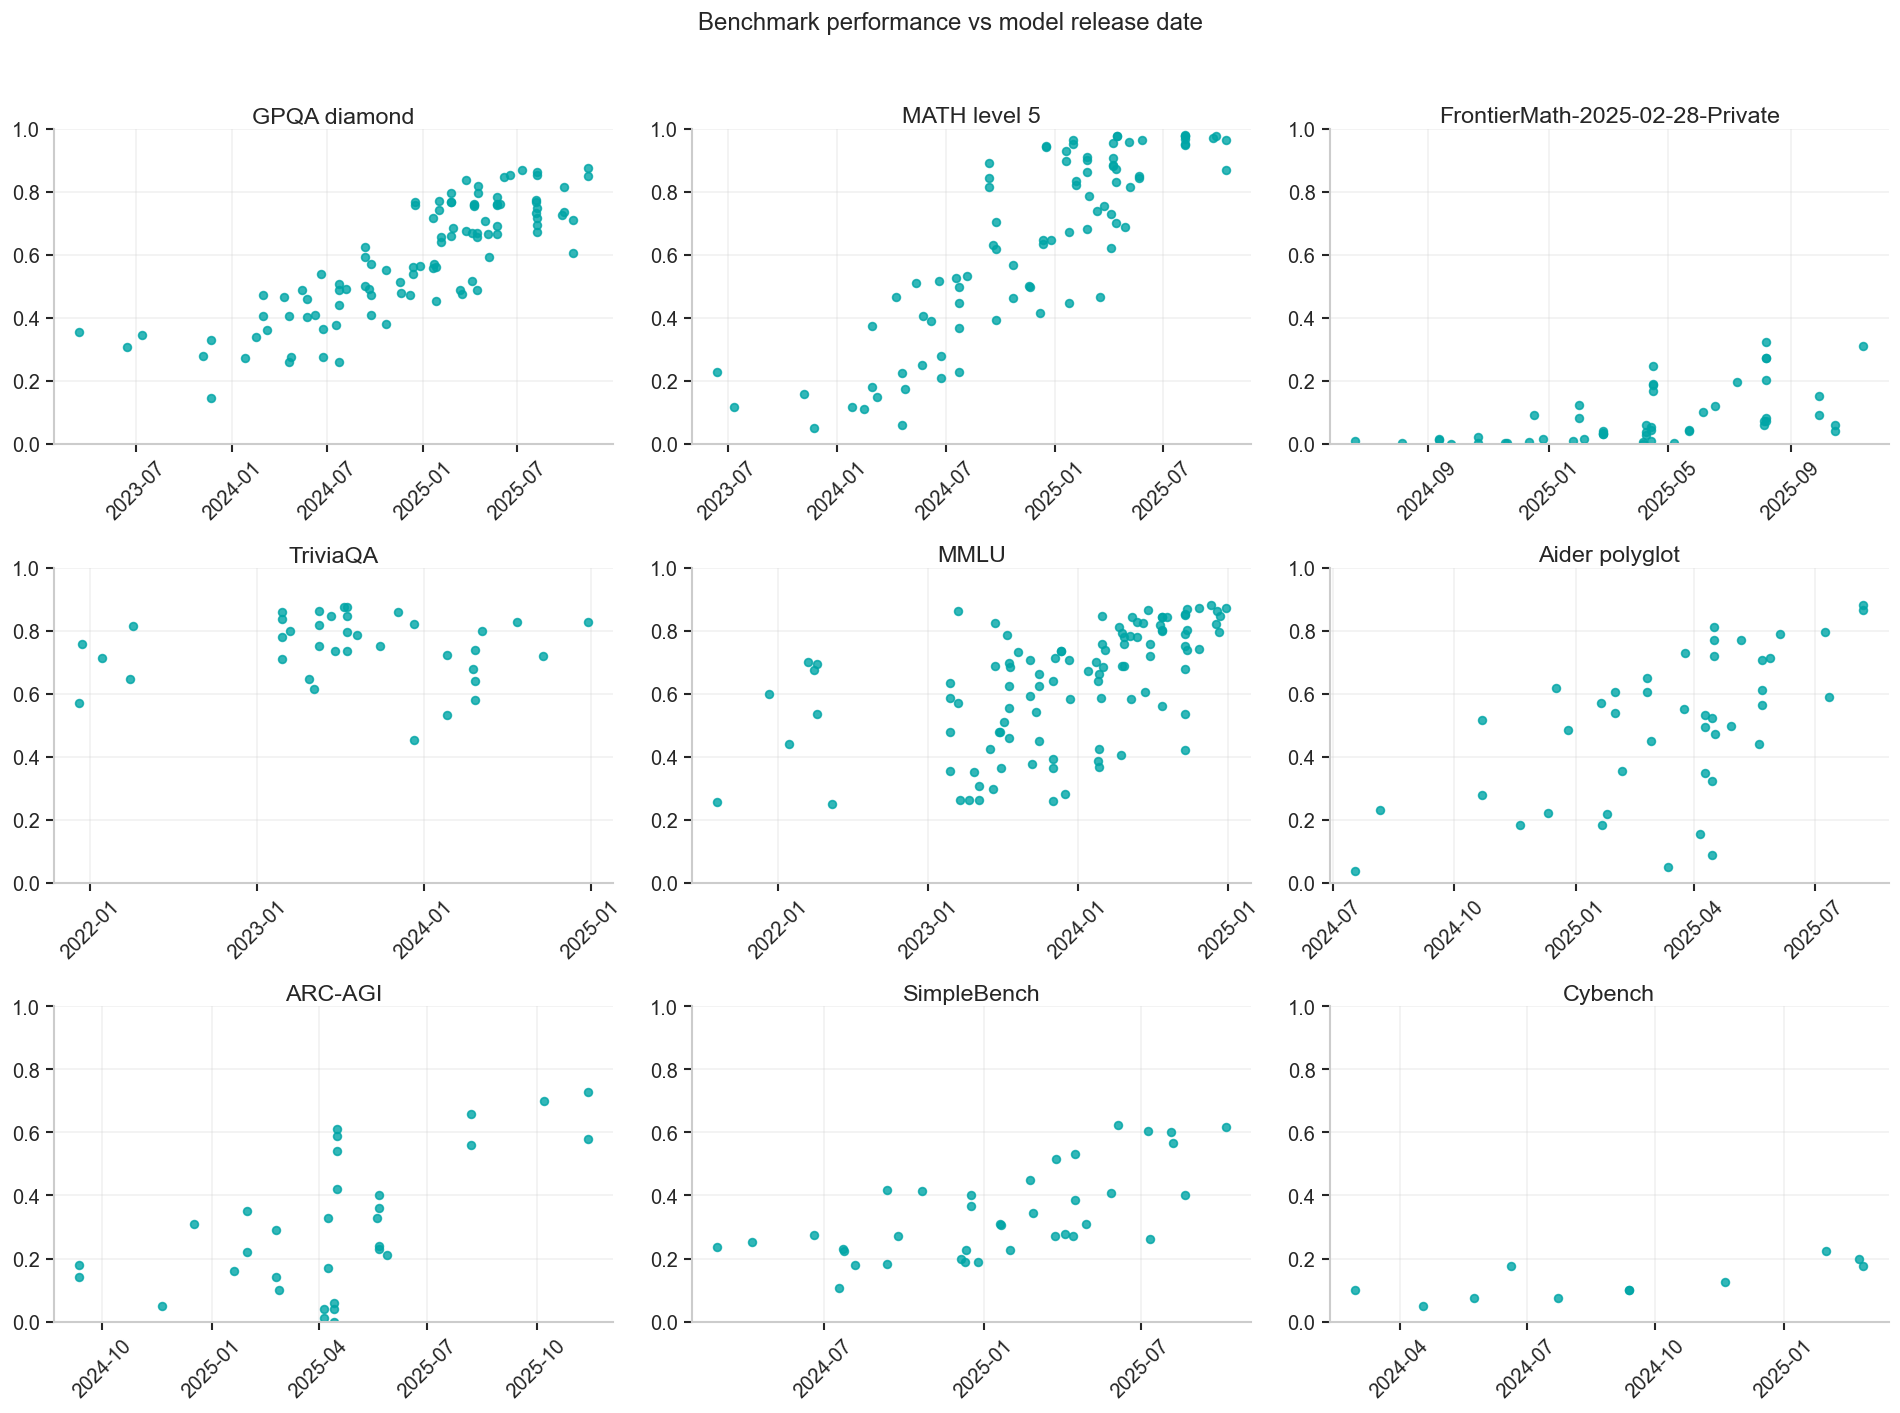

In [7]:
# 3x3 grid: Benchmark performance vs time for selected benchmarks (or random if none specified)
import numpy as np

# Prepare data
_df = scores_df.copy()
_df['date_parsed'] = pd.to_datetime(_df['date'], errors='coerce')

# Specify benchmarks to include (edit this list). If empty, a random selection will be used.
user_selected_benchmarks = [
    "GPQA diamond", "MATH level 5", "FrontierMath-2025-02-28-Private", 
    "TriviaQA", "MMLU", "Aider polyglot",
    "ARC-AGI", "SimpleBench", "Cybench"
]

rng = np.random.default_rng(0)
unique_benchmarks = _df['benchmark'].dropna().unique().tolist()

if len(user_selected_benchmarks) > 0:
    # Validate and keep only those present
    selected_clean = [b for b in user_selected_benchmarks if b in unique_benchmarks]
    missing = [b for b in user_selected_benchmarks if b not in unique_benchmarks]
    if missing:
        print(f"Warning: {len(missing)} benchmarks not found and will be skipped: {missing}")
    selected_benchmarks = np.array(selected_clean)
else:
    # Fallback to random nine
    num_to_draw = min(9, len(unique_benchmarks))
    selected_benchmarks = rng.choice(unique_benchmarks, size=num_to_draw, replace=False)

# Cap at 9 for a 3x3 grid
if len(selected_benchmarks) > 9:
    print(f"Note: More than 9 specified; showing the first 9: {selected_benchmarks[:9].tolist()}")
    selected_benchmarks = selected_benchmarks[:9]

num_to_plot = len(selected_benchmarks)

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 12), sharey=True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= num_to_plot:
        fig.delaxes(ax)
        continue
    bench = selected_benchmarks[i]
    sub = (
        _df[_df['benchmark'] == bench]
        .dropna(subset=['date_parsed', 'performance'])
        .sort_values('date_parsed')
    )
    ax.scatter(sub['date_parsed'], sub['performance'], s=22, alpha=0.8)
    ax.set_title(str(bench))
    ax.set_ylim(0, 1)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=3, maxticks=6))
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    ax.grid(True, alpha=0.3)

    # Ensure tick labels show on all subplots (not just edge axes)
    ax.tick_params(labelbottom=True, labelleft=True)
    for lbl in ax.get_xticklabels():
        lbl.set_visible(True)
    for lbl in ax.get_yticklabels():
        lbl.set_visible(True)

fig.suptitle('Benchmark performance vs model release date')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("outputs/notebooks/benchmark_performance_vs_time_grid.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [8]:
pd.read_csv("https://epoch.ai/data/all_ai_models.csv")["Notability criteria"]

0        Significant use
1        Significant use
2       SOTA improvement
3                    NaN
4                    NaN
              ...       
3198                 NaN
3199                 NaN
3200                 NaN
3201                 NaN
3202                 NaN
Name: Notability criteria, Length: 3203, dtype: object

In [9]:
# Fraction of models in scores_df that are notable per Epoch all_ai_models (using model name mapping)
import pandas as pd

# Map model IDs in scores_df to human-readable names using model_versions.csv
_mv = pd.read_csv("data/model_versions.csv")[["id", "Model"]].rename(columns={"id": "model"})
_unique_ids = scores_df[["model"]].drop_duplicates()
_unique_with_names = _unique_ids.merge(_mv, on="model", how="left")

# Use the mapped name when available; fall back to the ID string
_unique_with_names["model_name"] = _unique_with_names["Model"].fillna(_unique_with_names["model"].astype(str))
_unique_with_names["model_norm"] = _unique_with_names["model_name"].astype(str).str.lower().str.strip()

# Load Epoch's all_ai_models.csv and normalize
_df_all = pd.read_csv("https://epoch.ai/data/all_ai_models.csv")
_name_candidates = [
    "Model", "Name", "Model name", "Model Name", "model", "name", "model_name"
]
_name_col = next((c for c in _name_candidates if c in _df_all.columns), None)

if _name_col is None:
    print("Could not find a model name column in all_ai_models.csv; available columns:")
    print(list(_df_all.columns))
else:
    _df_all = _df_all.copy()
    _df_all["model_norm"] = _df_all[_name_col].astype(str).str.lower().str.strip()
    _df_all_norm = _df_all[["model_norm", "Notability criteria", _name_col]].drop_duplicates(subset=["model_norm"])

    # Merge normalized names to attach notability
    _merged = _unique_with_names.merge(_df_all_norm, on="model_norm", how="left")
    _merged["is_notable"] = _merged["Notability criteria"].notna()

    _total = len(_merged)
    _num_notable = int(_merged["is_notable"].sum())
    _frac_notable = _num_notable / _total if _total else float("nan")

    print(f"Unique model IDs in scores_df: {_total}")
    print(f"Models with non-NaN 'Notability criteria': {_num_notable}")
    print(f"Fraction notable: {_frac_notable:.3f}")

    # Diagnostics
    _num_missing_names = int(_unique_with_names["Model"].isna().sum())
    if _num_missing_names:
        print(f"Warning: {_num_missing_names} model IDs lacked a name in model_versions.csv (using ID as fallback).")

    _missing_examples = _merged.loc[~_merged["is_notable"], "model_name"].head(20).tolist()
    if _missing_examples:
        print("Examples without 'Notability criteria':", _missing_examples)



Unique model IDs in scores_df: 192
Models with non-NaN 'Notability criteria': 107
Fraction notable: 0.557
Examples without 'Notability criteria': ['o4-mini', 'Gemini 2.5 Flash', 'Gemini 2.5 Flash', 'DeepSeek-V3.1', 'Gemini 2.0 Flash', 'phi-3-small 7.4B', 'Phi-2', 'Mistral 7B', 'Gemma 7B', 'Yi 6B', 'Yi-9B', 'PaLM 2-S', 'PaLM 2-M', 'PaLM 2-L', 'Falcon-7B', 'MPT-7B', 'chatglm2-6b', 'internlm-7b', 'internlm-20b', 'Baichuan 2-7B']


In [10]:
# Setup environment and imports (mirrors analyze_data_exploration.py)
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure project root cwd for relative paths
from analysis_utils import setup_analysis_environment, setup_plotting_style
setup_analysis_environment()
setup_plotting_style()

# Load prepared dataframes
from data_loader import scores_df

# Output directory (same as script)
output_dir = Path("outputs/data_exploration")
output_dir.mkdir(parents=True, exist_ok=True)

scores_df.head(3)


,model_id,benchmark_id,performance,benchmark,benchmark_release_date,optimized,is_math,is_coding,model,date,source
0,m1,b1,0.850,GPQA diamond,2023-11-20,True,False,False,gpt-5.1_medium,2025-11-13,Epoch evaluations
1,m1,b34,0.476,Terminal Bench,2025-05-19,True,False,True,gpt-5.1_medium,2025-11-13,Terminal-Bench Leaderboard
2,m1,b38,0.533,VPCT,2025-01-30,False,False,False,gpt-5.1_medium,2025-11-13,VPCT leaderboard


In [11]:
# Dataset overview (generate_dataset_overview)

df = scores_df.copy()
df['date'] = pd.to_datetime(df['date'])

# Basic statistics
total_entries = len(df)
unique_models = df['model'].nunique()
unique_benchmarks = df['benchmark'].nunique()

# Date range
dates = pd.to_datetime(df['date'])
date_range = f"{dates.min().strftime('%Y-%m-%d')} to {dates.max().strftime('%Y-%m-%d')}"

# Performance statistics
perf_stats = df['performance'].describe()

# Optional breakdowns
source_counts = df['source'].value_counts() if 'source' in df.columns else None
optim_counts = df['optimized'].value_counts() if 'optimized' in df.columns else None

# Benchmark stats (top 15 by model coverage)
benchmark_stats = df.groupby('benchmark').agg({
    'model': 'nunique',
    'performance': ['mean', 'std', 'min', 'max']
}).round(4)
benchmark_stats.columns = ['num_models', 'mean_perf', 'std_perf', 'min_perf', 'max_perf']
benchmark_stats = benchmark_stats.sort_values('num_models', ascending=False)

# Persist to outputs (match script behavior)
overview_path = output_dir / "dataset_overview.txt"
with open(overview_path, 'w') as f:
    f.write("BENCHMARK STITCHING DATASET OVERVIEW\n")
    f.write("=" * 50 + "\n\n")
    f.write("BASIC STATISTICS:\n")
    f.write(f"  Total entries: {total_entries:,}\n")
    f.write(f"  Unique models: {unique_models}\n")
    f.write(f"  Unique benchmarks: {unique_benchmarks}\n")
    f.write(f"  Date range: {date_range}\n\n")

    f.write("PERFORMANCE STATISTICS:\n")
    for stat, value in perf_stats.items():
        f.write(f"  {stat}: {value:.4f}\n")
    f.write("\n")

    if source_counts is not None:
        f.write("SOURCE BREAKDOWN:\n")
        for source, count in source_counts.items():
            f.write(f"  {source}: {count} ({count/total_entries*100:.1f}%)\n")
        f.write("\n")

    if optim_counts is not None:
        f.write("OPTIMIZATION STATUS:\n")
        for status, count in optim_counts.items():
            f.write(f"  {'Optimized' if status else 'Not optimized'}: {count} ({count/total_entries*100:.1f}%)\n")
        f.write("\n")

    f.write("BENCHMARK STATISTICS (Top 15 by model count):\n")
    f.write(f"{'Benchmark':<30} {'Models':<8} {'Mean':<8} {'Std':<8} {'Min':<8} {'Max':<8}\n")
    f.write("-" * 80 + "\n")
    for benchmark, row in benchmark_stats.head(15).iterrows():
        f.write(f"{benchmark:<30} {row['num_models']:<8} {row['mean_perf']:<8.3f} "
                f"{row['std_perf']:<8.3f} {row['min_perf']:<8.3f} {row['max_perf']:<8.3f}\n")

# benchmark_stats.to_csv(output_dir / "benchmark_statistics.csv")

# print("Overview written to:", overview_path)
{
    'total_entries': total_entries,
    'unique_models': unique_models,
    'unique_benchmarks': unique_benchmarks,
    'date_range': date_range
}


{'total_entries': 1403,
 'unique_models': 192,
 'unique_benchmarks': 40,
 'date_range': '2019-11-05 to 2025-11-13'}

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/figures/figure-18.svg'

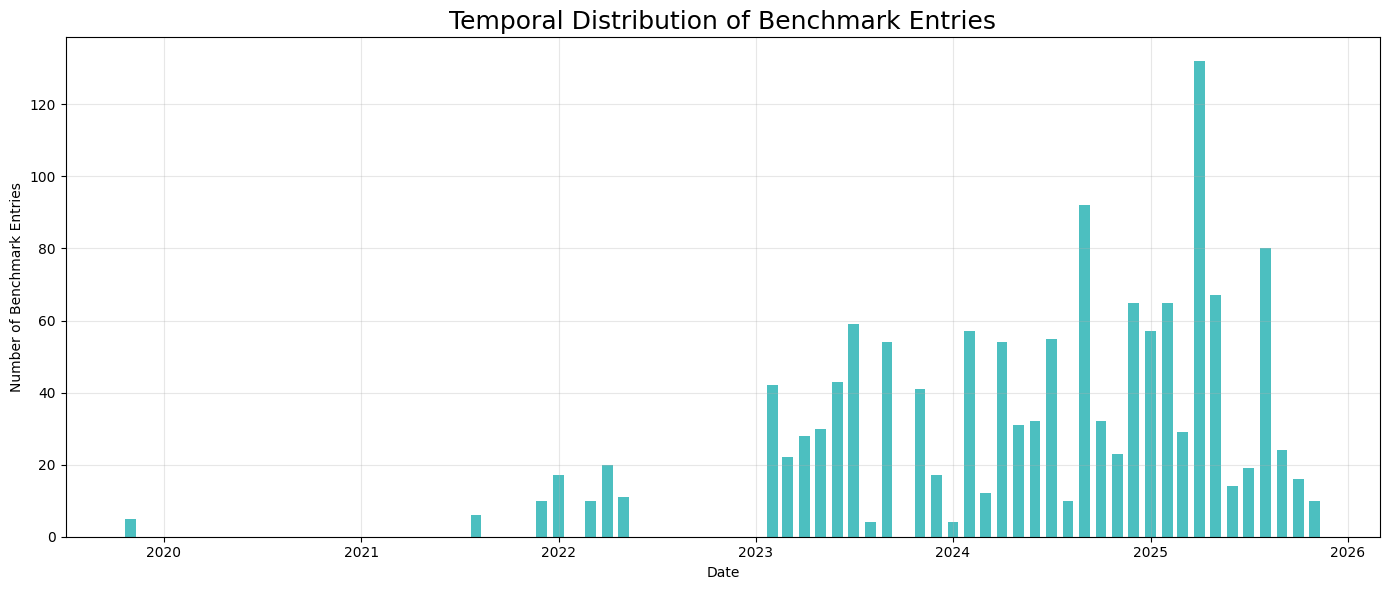

In [12]:
# Temporal distribution (analyze_temporal_distribution)

df = scores_df.copy()
df['date_obj'] = pd.to_datetime(df['date'])
df['year_month'] = df['date_obj'].dt.to_period('M')
monthly_counts = df.groupby('year_month').size().reset_index(name='count')
monthly_counts['date'] = monthly_counts['year_month'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(monthly_counts['date'], monthly_counts['count'], width=20, alpha=0.7, color=colors[0])
ax.set_xlabel('Date')
ax.set_ylabel('Number of Benchmark Entries')
ax.set_title('Temporal Distribution of Benchmark Entries', fontsize=18)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
# Format dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(output_dir / "temporal_distribution.pdf", dpi=300, bbox_inches='tight')
plt.savefig('outputs/figures/figure-18.svg', format='svg')

monthly_counts.head(10)


{'most_covered_benchmark': ('GPQA diamond', 101),
 'most_evaluated_model': ('claude-3-7-sonnet-20250219', 20)}

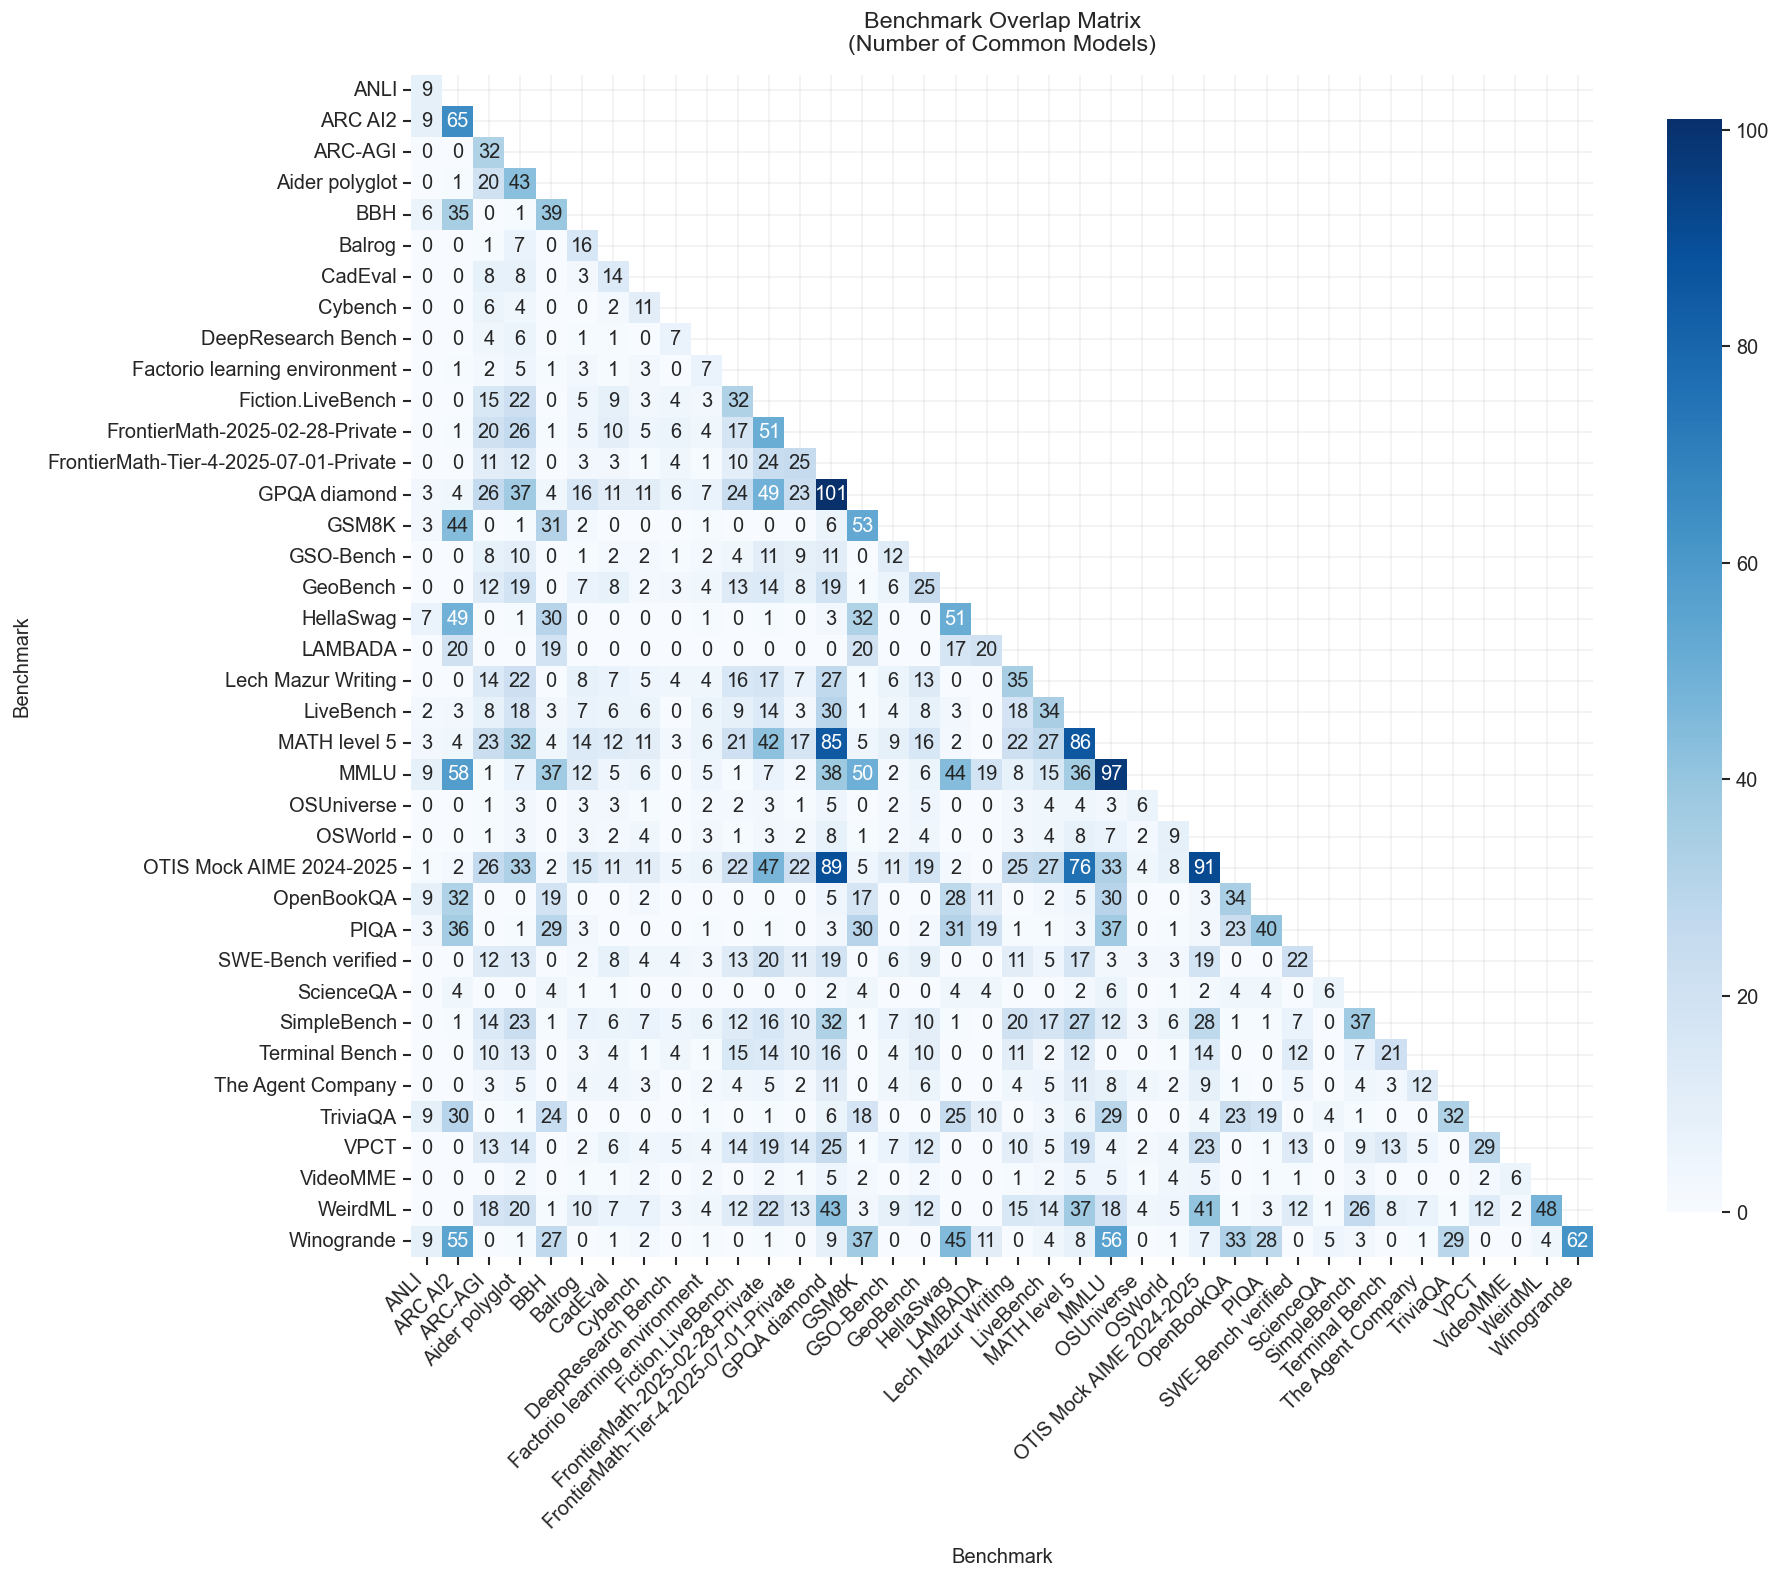

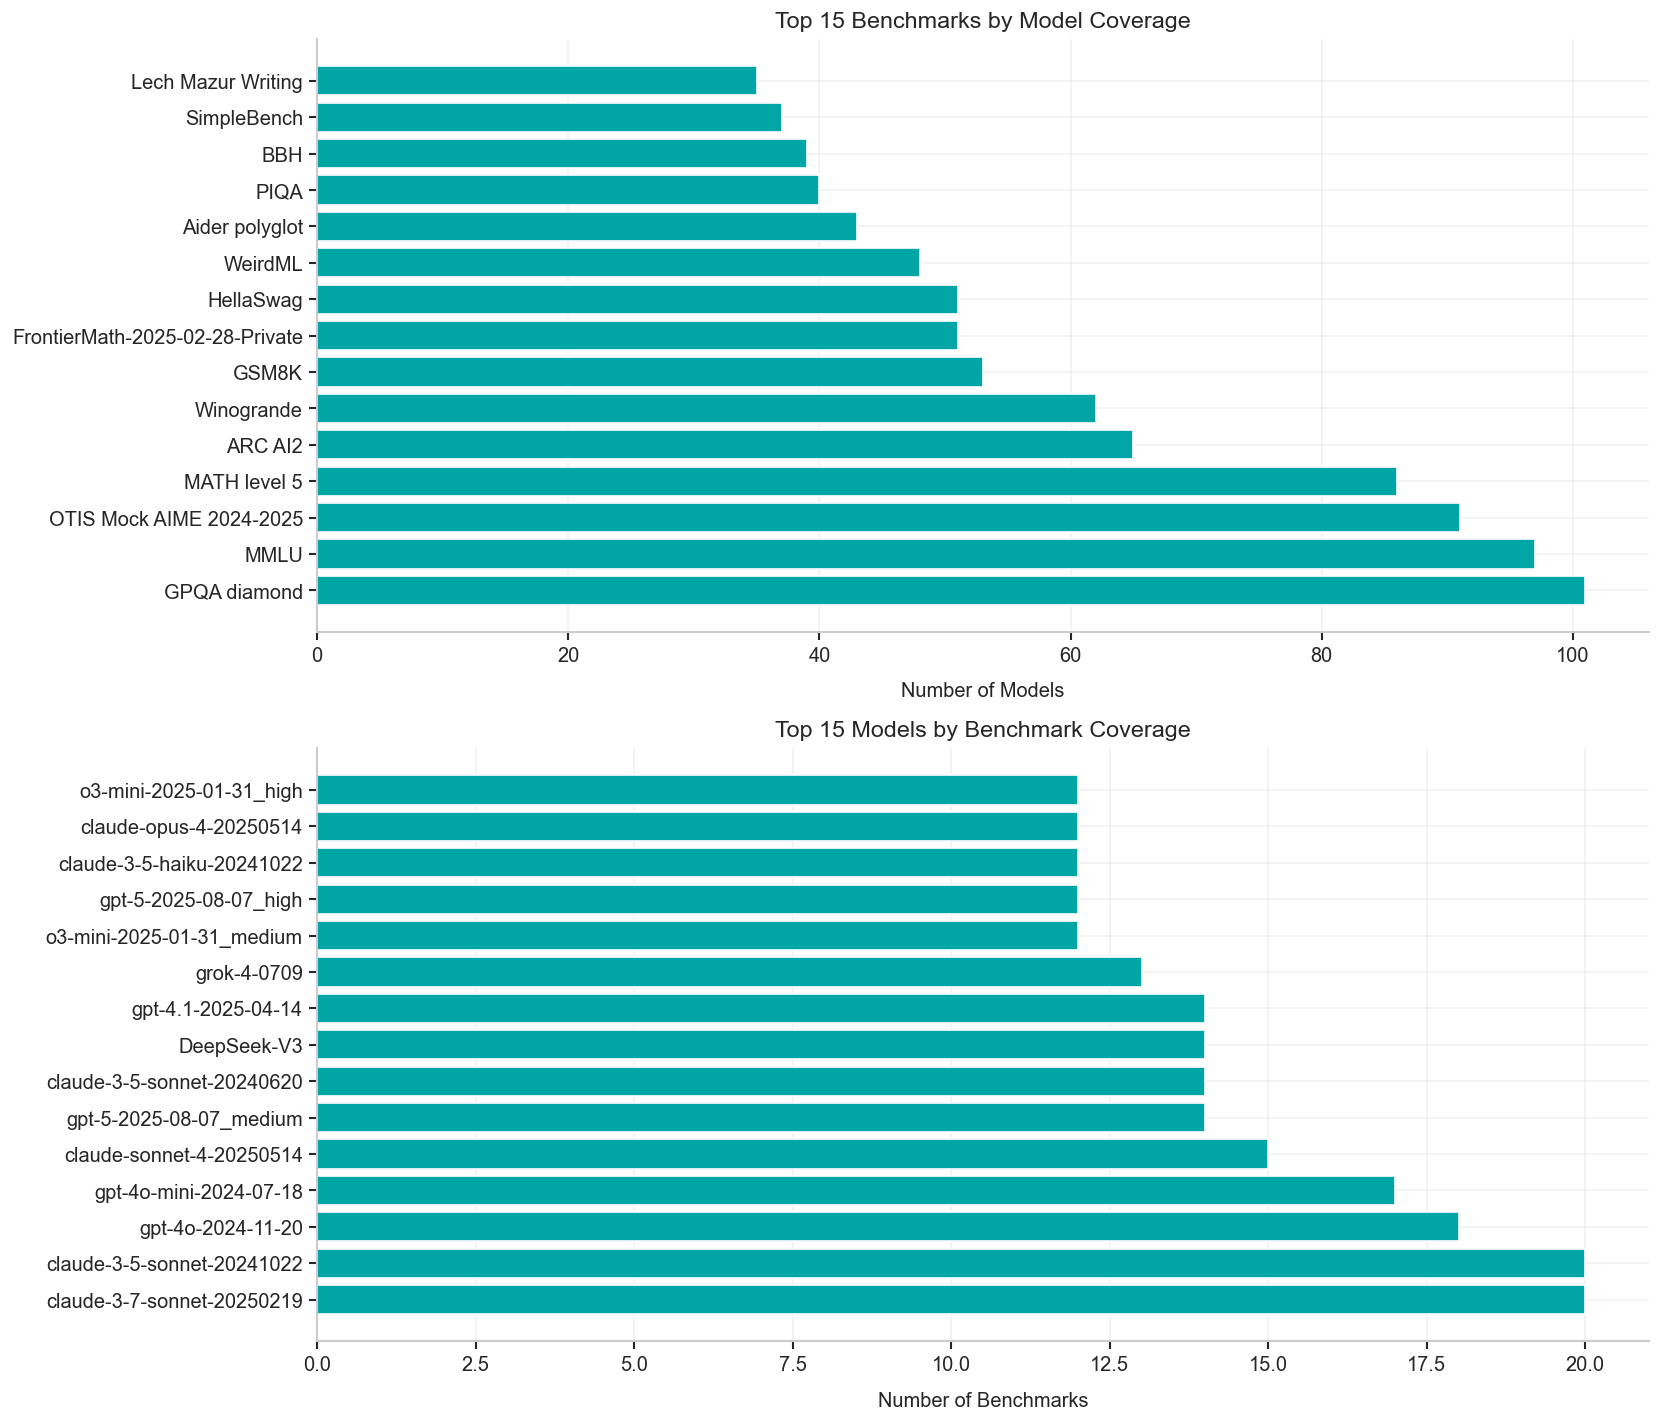

In [11]:
# Overlap matrix and coverage (create_overlap_matrix + analyze_benchmark_coverage)

# Model-benchmark matrix (count of records per model-benchmark)
model_benchmark_matrix = scores_df.pivot_table(
    index='model',
    columns='benchmark',
    values='performance',
    aggfunc='count',
    fill_value=0
)

# Binary presence matrix
model_benchmark_binary = (model_benchmark_matrix > 0).astype(int)

# Overlap matrix: common models between benchmark pairs
overlap_matrix = model_benchmark_binary.T @ model_benchmark_binary

# Heatmap (lower triangle)
fig, ax = plt.subplots(figsize=(16, 14))
mask = np.triu(np.ones_like(overlap_matrix), k=1)
sns.heatmap(
    overlap_matrix,
    mask=mask,
    annot=True,
    fmt='d',
    cmap='Blues',
    square=True,
    ax=ax,
    cbar_kws={"shrink": .8}
)
ax.set_title('Benchmark Overlap Matrix\n(Number of Common Models)', fontsize=14)
ax.set_xlabel('Benchmark')
ax.set_ylabel('Benchmark')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("outputs/data_exploration/benchmark_overlap_matrix.pdf", dpi=300, bbox_inches='tight')
# plt.savefig('outputs/figures/figure-10.svg', format='svg')

# Coverage stats
models_per_benchmark = model_benchmark_binary.sum(axis=0).sort_values(ascending=False)
benchmarks_per_model = model_benchmark_binary.sum(axis=1).sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))
# Top benchmarks by model count
top_benchmarks = models_per_benchmark.head(15)
ax1.barh(range(len(top_benchmarks)), top_benchmarks.values)
ax1.set_yticks(range(len(top_benchmarks)))
ax1.set_yticklabels(top_benchmarks.index)
ax1.set_xlabel('Number of Models')
ax1.set_title('Top 15 Benchmarks by Model Coverage')
ax1.grid(True, alpha=0.3, axis='x')

# Top models by benchmark count
top_models = benchmarks_per_model.head(15)
ax2.barh(range(len(top_models)), top_models.values)
ax2.set_yticks(range(len(top_models)))
ax2.set_yticklabels(top_models.index)
ax2.set_xlabel('Number of Benchmarks')
ax2.set_title('Top 15 Models by Benchmark Coverage')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig("outputs/data_exploration/benchmark_coverage_analysis.pdf", dpi=300, bbox_inches='tight')


{
    'most_covered_benchmark': (models_per_benchmark.index[0], int(models_per_benchmark.iloc[0])) if len(models_per_benchmark) else None,
    'most_evaluated_model': (benchmarks_per_model.index[0], int(benchmarks_per_model.iloc[0])) if len(benchmarks_per_model) else None
}
